### 스팸메일 분류
- https://wikidocs.net/22894
- https://www.kaggle.com/uciml/sms-spam-collection-dataset

In [26]:
import pandas as pd
df = pd.read_csv('Data/spam.csv',encoding='latin1')
df.head(3)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [27]:
# ham => 0, spam => 1 로 바꾸어 저장
df['v1'] = df['v1'].replace(['ham','spam'],[0,1])
df[:3]

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


In [28]:
x = df[['v2']] #독립변수
y = df['v1'] #종속변수
print(x[:3])
print(y[:3])

                                                  v2
0  Go until jurong point, crazy.. Available only ...
1                      Ok lar... Joking wif u oni...
2  Free entry in 2 a wkly comp to win FA Cup fina...
0    0
1    0
2    1
Name: v1, dtype: int64


v1
0    4825
1     747
Name: count, dtype: int64


<Axes: xlabel='v1'>

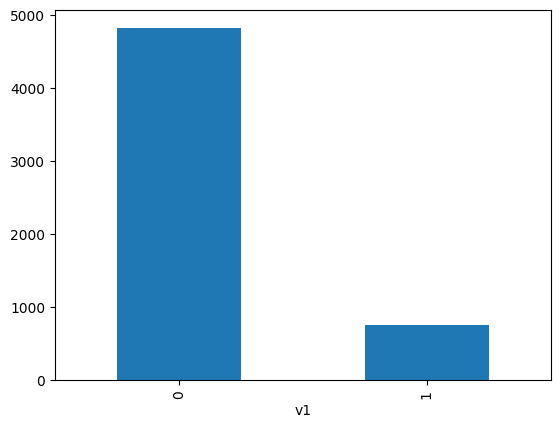

In [29]:
print(y.value_counts())
y.value_counts().plot(kind='bar')

v1
0    747
1    747
Name: count, dtype: int64


<Axes: xlabel='v1'>

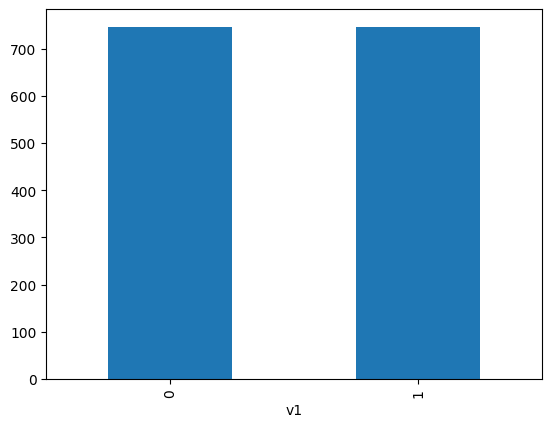

In [5]:
# under sampling
from imblearn.under_sampling import RandomUnderSampler
x_samp, y_samp = RandomUnderSampler(random_state=0).fit_resample(x, y)
x_samp = pd.DataFrame(data=x_samp, columns=['v2'])
y_samp = pd.DataFrame(data=y_samp, columns=['v1'])
df_samp = pd.concat([x_samp, y_samp], axis = 1)

print(df_samp['v1'].value_counts())
df_samp['v1'].value_counts().plot(kind='bar')

In [7]:
x = df_samp['v2']
y = df_samp['v1']

In [9]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)

sequences = tokenizer.texts_to_sequences(x)
print(sequences[:5])

[[1486, 49, 801, 1487, 18, 336, 87, 26, 2274, 45, 27, 173], [1148, 14, 4, 25, 613], [174, 149, 4, 2, 189, 5, 105, 17, 614, 613], [946, 88, 38, 399, 702, 1, 2275, 1488, 130, 2276, 26, 1489, 242, 45, 702, 1, 2277, 2278, 24, 46, 1149], [7, 291, 1490, 802, 553, 53, 316, 26, 803, 703, 25, 63, 47, 217, 1491, 13, 434, 337, 97]]


In [11]:
# 단어와 인덱스 목록

word_to_index = tokenizer.word_index
word_to_index

{'to': 1,
 'you': 2,
 'a': 3,
 'call': 4,
 'i': 5,
 'the': 6,
 'u': 7,
 'your': 8,
 'for': 9,
 'is': 10,
 'now': 11,
 'and': 12,
 '2': 13,
 'free': 14,
 'or': 15,
 'have': 16,
 'in': 17,
 'on': 18,
 'ur': 19,
 'of': 20,
 'txt': 21,
 '4': 22,
 'with': 23,
 'from': 24,
 'me': 25,
 'my': 26,
 'get': 27,
 'are': 28,
 'text': 29,
 'it': 30,
 'mobile': 31,
 'stop': 32,
 'just': 33,
 'no': 34,
 'this': 35,
 'claim': 36,
 'reply': 37,
 'we': 38,
 'be': 39,
 'out': 40,
 'if': 41,
 'www': 42,
 'that': 43,
 'do': 44,
 'can': 45,
 'our': 46,
 'at': 47,
 'prize': 48,
 'only': 49,
 'not': 50,
 'will': 51,
 'send': 52,
 'so': 53,
 'new': 54,
 'cash': 55,
 'go': 56,
 'won': 57,
 'please': 58,
 'but': 59,
 '150p': 60,
 "i'm": 61,
 't': 62,
 'up': 63,
 'win': 64,
 'uk': 65,
 'nokia': 66,
 'week': 67,
 'what': 68,
 'urgent': 69,
 'all': 70,
 'know': 71,
 'who': 72,
 'by': 73,
 'msg': 74,
 '1': 75,
 'as': 76,
 'tone': 77,
 'contact': 78,
 'want': 79,
 'com': 80,
 'been': 81,
 'service': 82,
 'ok': 83,
 '5

In [12]:
for idx, word in enumerate(word_to_index):
    print(idx+1, word, end=',')
    if idx>8:
        break    

1 to,2 you,3 a,4 call,5 i,6 the,7 u,8 your,9 for,10 is,

메일 최대 길이: 77
메일 평균길이:  19.846050870147256


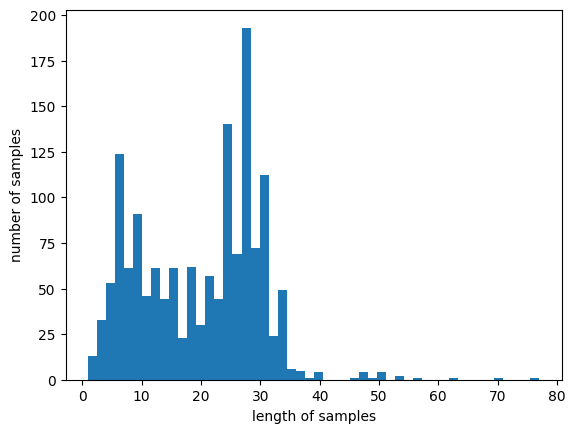

In [15]:
import matplotlib.pyplot as plt
x_data = sequences
print('메일 최대 길이: %d' %max(len(l) for l in x_data))
print('메일 평균길이: ', sum(map(len, x_data))/len(x_data))
plt.hist([len(s) for s in x_data], bins = 50)
plt.xlabel('length of samples')   # 길이
plt.ylabel('number of samples')   # 샘플수
plt.show()

In [17]:
from tensorflow.keras.preprocessing import sequence
data = sequence.pad_sequences(x_data, maxlen=77)
print('학습용 데이터 크기(shape): ', data.shape)
print(data[:3])

학습용 데이터 크기(shape):  (1494, 77)
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0 1486   49  801 1487   18
   336   87   26 2274   45   27  173]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0 1148   14    4   25  613]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0   

In [18]:
# split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size = 0.2, stratify= y, random_state=10)

In [22]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, SimpleRNN

# create the model
model = Sequential()
model.add(Embedding(len(word_to_index)+1, 32))  
    # Embedding(입력사이즈, 출력사이즈)
model.add(SimpleRNN(32))  # output사이즈 32
# model.add(LSTM(32))  # long short_Term memory  문장을 단어들의 시퀀스로 간주하고 순환레이어의 입력으로 사용
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics =['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          149120    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 151233 (590.75 KB)
Trainable params: 151233 (590.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
hist = model.fit(x_train, y_train.values, epochs=10, batch_size=64, validation_split=0.2)

# final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print('Test Set Accuracy: %.4f'% (scores[1]*100))

Epoch 1/10
15/15 [==============================] - 1s 26ms/step - loss: 0.6056 - accuracy: 0.7176 - val_loss: 0.4732 - val_accuracy: 0.8410
Epoch 2/10
15/15 [==============================] - 0s 10ms/step - loss: 0.4096 - accuracy: 0.8483 - val_loss: 0.4074 - val_accuracy: 0.8452
Epoch 3/10
15/15 [==============================] - 0s 11ms/step - loss: 0.3198 - accuracy: 0.8964 - val_loss: 0.3607 - val_accuracy: 0.8619
Epoch 4/10
15/15 [==============================] - 0s 11ms/step - loss: 0.2054 - accuracy: 0.9425 - val_loss: 0.2367 - val_accuracy: 0.9372
Epoch 5/10
15/15 [==============================] - 0s 11ms/step - loss: 0.1341 - accuracy: 0.9686 - val_loss: 0.2441 - val_accuracy: 0.9121
Epoch 6/10
15/15 [==============================] - 0s 11ms/step - loss: 0.1011 - accuracy: 0.9770 - val_loss: 0.2016 - val_accuracy: 0.9414
Epoch 7/10
15/15 [==============================] - 0s 11ms/step - loss: 0.0652 - accuracy: 0.9864 - val_loss: 0.2451 - val_accuracy: 0.9414
Epoch 8/10
15

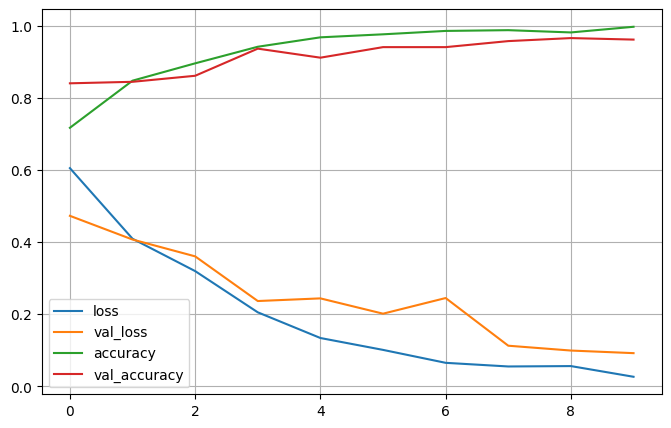

In [24]:
# 모델 학습 과정 표시

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(hist.history['loss']) #손실
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss','accuracy','val_accuracy'])
plt.grid()
plt.show()

In [25]:
model.predict(x_test[:3])

1/1 [==============================] - 0s 139ms/step


array([[0.90502095],
       [0.01908192],
       [0.9854605 ]], dtype=float32)

In [30]:
# LSTM으로 다시 해보기
model = Sequential()
model.add(Embedding(len(word_to_index)+1, 32, input_length=77))  
    # Embedding(입력사이즈, 출력사이즈)
# model.add(SimpleRNN(32))  # output사이즈 32
model.add(LSTM(32))  # long short_Term memory  문장을 단어들의 시퀀스로 간주하고 순환레이어의 입력으로 사용
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics =['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 77, 32)            149120    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 157473 (615.13 KB)
Trainable params: 157473 (615.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
hist = model.fit(x_train, y_train.values, epochs=10, batch_size=64, validation_split=0.2)

# final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print('Test Set Accuracy: %.4f'% (scores[1]*100))

Epoch 1/10
15/15 [==============================] - 2s 45ms/step - loss: 0.6773 - accuracy: 0.7301 - val_loss: 0.6271 - val_accuracy: 0.8703
Epoch 2/10
15/15 [==============================] - 0s 20ms/step - loss: 0.5325 - accuracy: 0.8630 - val_loss: 0.4344 - val_accuracy: 0.8703
Epoch 3/10
15/15 [==============================] - 0s 23ms/step - loss: 0.3772 - accuracy: 0.8860 - val_loss: 0.3249 - val_accuracy: 0.8912
Epoch 4/10
15/15 [==============================] - 0s 19ms/step - loss: 0.2785 - accuracy: 0.9121 - val_loss: 0.2562 - val_accuracy: 0.9205
Epoch 5/10
15/15 [==============================] - 0s 19ms/step - loss: 0.2054 - accuracy: 0.9393 - val_loss: 0.1796 - val_accuracy: 0.9582
Epoch 6/10
15/15 [==============================] - 0s 19ms/step - loss: 0.1435 - accuracy: 0.9634 - val_loss: 0.1571 - val_accuracy: 0.9498
Epoch 7/10
15/15 [==============================] - 0s 19ms/step - loss: 0.1098 - accuracy: 0.9749 - val_loss: 0.1222 - val_accuracy: 0.9582
Epoch 8/10
15

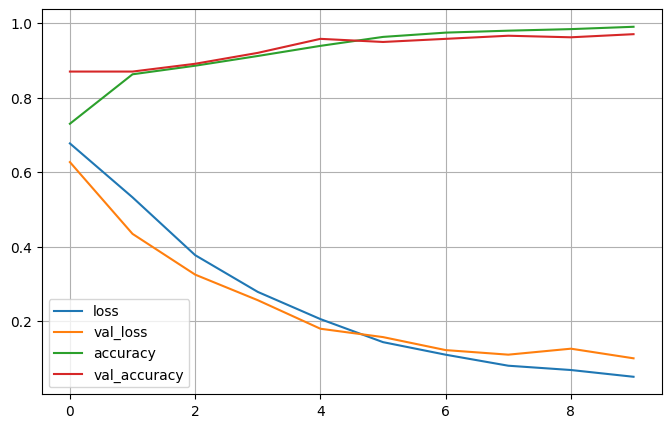

In [32]:
# 모델 학습 과정 표시

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(hist.history['loss']) #손실
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss','accuracy','val_accuracy'])
plt.grid()
plt.show()

In [33]:
model.predict(x_test[:3])     # 0.5 기준으로 스팸여부 식별 (0.9283 >>> 1   / 0.0241 >>> 0)

1/1 [==============================] - 0s 344ms/step


array([[0.92834467],
       [0.02419667],
       [0.9879221 ]], dtype=float32)